# Predicting Heat Capacity using ML

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from collections import OrderedDict

In [35]:
data = pd.read_csv('downloads/cp_data_cleaned.csv')

In [36]:
data.head()

,formula,T,Cp
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625


In [37]:
data.shape

(4547, 3)

Separate into input and target variables

In [38]:
x = data[['formula', 'T']]
y = data['Cp']

In [39]:
x.shape

(4547, 2)

In [40]:
y.shape

(4547,)

Separate data into test and train data, make sure that each formula appears ONLY in test, train, or validation

In [41]:
uniqueFormula = x['formula'].unique()
numUnique = len(uniqueFormula)
print(numUnique,uniqueFormula)

244 ['B2O3' 'Be1I2' 'Be1F3Li1' 'Al1Cl4K1' 'Al2Be1O4' 'B2H4O4' 'B2Mg1' 'Be1F2'
 'B1H4Na1' 'Br2Ca1' 'Al1N1' 'Al1Cl6Na3' 'Ba1H2O2' 'Al1Br3' 'Br3Zr1'
 'Br2Ti1' 'B1Ti1' 'Be2O4Si1' 'Br2Pb1' 'Al1' 'Br2Hg2' 'B1H3O3' 'Br3Ti1'
 'C1Cu1N1' 'B1' 'Al1F6Na3' 'Ca1H2O2' 'B2Be3O6' 'Al1Cl4Na1' 'Al1Cl6K3'
 'C0.98Nb1' 'Br2Hg1' 'Al1Cl1O1' 'Cl1H4N1O4' 'Be1F4Li2' 'C1Mg1O3' 'Br1H4N1'
 'Ca1I2' 'Al1F6Li3' 'Br4Mo1' 'Ba1' 'Br4Ti1' 'Ba1Br2' 'Be1O4S1' 'Ba1F2'
 'Ba1I2' 'Cl2Fe1' 'C1K1N1' 'Be1H2O2' 'Cs1' 'Al1H4Li1' 'C1Be2' 'Cr1'
 'Cs2O4S1' 'Cl1Cu1' 'Cu1F2' 'Al2O3' 'B1N1' 'Co1O4S1' 'Cu1O1' 'Br1Na1'
 'Cr2O3' 'Cs1F1' 'Cr2N1' 'Cl1Li1' 'Fe0.877S1' 'Cl1Na1' 'F2Hg1' 'Fe1H2O2'
 'Cs1H1O1' 'Br3Mo1' 'Br2Sr1' 'Cl2Hg2' 'Fe1O1' 'Co1' 'Cl1Cs1' 'Cu1H2O2'
 'Al1Li1O2' 'Co1F2' 'Br2Fe1' 'Fe1I2' 'Ga1' 'Cl1Li1O4' 'Cl2Cu1' 'Fe0.947O1'
 'Be1Cl2' 'Cl1K1' 'F1Na1' 'H3O4P1' 'Fe3O4' 'H1Na1O1' 'Fe2O12S3' 'H1Na1'
 'Cl1Na1O4' 'B1F4K1' 'Cu1O4S1' 'H1Li1' 'F2H1K1' 'B1H4Li1' 'Hg1O1' 'Be3N2'
 'Fe1' 'I2Mo1' 'Cu1F1' 'Cr1N1' 'Fe1H3O3' 'I1Li1' 'Al1I3' 'Fe1S1'

In [42]:
trainingSet = uniqueFormula.copy()

In [43]:
#determine ratio of dataset in val, test, and train
val_rat = 0.2
test_rat = 0.1
train_rat = 1 - val_rat - test_rat

#calculate number of formulas in each set
num_val = int(round(val_rat*numUnique))
num_test = int(round(test_rat*numUnique))
num_train = int(round(1 - val_rat - test_rat*numUnique))

#randomly select formulas for val & train data, remove from list
valSet = np.random.choice(trainingSet, size = num_val, replace = False)
trainingSet = [a for a in trainingSet if a not in valSet]

testSet = np.random.choice(trainingSet, size = num_test, replace = False)
trainingSet = [a for a in trainingSet if a not in testSet]

In [44]:
print('Validation set:', len(valSet))
print('Test set:', len(testSet))
print('Training set:', len(trainingSet))

Validation set: 49
Test set: 24
Training set: 171


Val, test, & train sets have been determined by formula, now dividing dataset 

In [45]:
df_train = data[data['formula'].isin(trainingSet)]
df_test = data[data['formula'].isin(testSet)]
df_val = data[data['formula'].isin(valSet)]

In [46]:
df_train.shape

(3116, 3)

In [47]:
df_train.head(10)

,formula,T,Cp
14,Be1I2,1400.0,89.341
15,Be1I2,1300.0,89.115
16,Be1I2,1200.0,88.780
17,Be1I2,1100.0,88.337
18,Be1I2,1000.0,87.789
19,Be1I2,900.0,87.132
20,Be1I2,800.0,86.366
21,Be1I2,753.0,85.944
22,Be1I2,600.0,84.190
23,Be1I2,500.0,81.638


In [48]:
df_test.shape

(435, 3)

In [49]:
df_test.head(10)

,formula,T,Cp
145,Al1N1,2900.0,51.845
146,Al1N1,2800.0,51.807
147,Al1N1,2700.0,51.765
148,Al1N1,2600.0,51.718
149,Al1N1,2500.0,51.666
150,Al1N1,2400.0,51.609
151,Al1N1,2300.0,51.543
152,Al1N1,2200.0,51.469
153,Al1N1,2100.0,51.385
154,Al1N1,2000.0,51.290


In [50]:
df_val.shape

(996, 3)

In [51]:
df_val.head(10)

,formula,T,Cp
0,B2O3,1400.0,134.306
1,B2O3,1300.0,131.294
2,B2O3,1200.0,128.072
3,B2O3,1100.0,124.516
4,B2O3,1000.0,120.625
5,B2O3,900.0,116.190
6,B2O3,800.0,111.169
7,B2O3,723.0,106.692
8,B2O3,700.0,105.228
9,B2O3,600.0,98.115


CHECK: make sure that there is no intersection between datasets

In [52]:
trainCheck = set(df_train['formula'].unique())
testCheck = set(df_test['formula'].unique())
valCheck = set(df_val['formula'].unique())

In [53]:
check1 = trainCheck.intersection(testCheck)
check2 = trainCheck.intersection(valCheck)
check3 = testCheck.intersection(valCheck)

print('intersections in check 1:', len(check1))
print('intersections in check 2:', len(check2))
print('intersections in check 3:', len(check3))

intersections in check 1: 0
intersections in check 2: 0
intersections in check 3: 0


In [54]:
df_train.to_csv('downloads/cp_train.csv')
df_test.to_csv('downloads/cp_test.csv')
df_val.to_csv('downloads/cp_val.csv')

# Preprocessing

Don't rerun test/train split! Want to make sure the datasets stay the same throughout testing - saved splits to csv for reproducability

In [2]:
pip install CBFV

Note: you may need to restart the kernel to use updated packages.


In [2]:
from CBFV.composition import generate_features

In [3]:
#save datasplits to csv for reproducability
df_train = pd.read_csv('downloads/cp_train.csv')
df_test = pd.read_csv('downloads/cp_test.csv')
df_val = pd.read_csv('downloads/cp_val.csv')

In [4]:
#rename Cp column to target for CBFV 
renameDict = {'Cp':'target'}

df_train = df_train.rename(columns=renameDict)
df_test = df_test.rename(columns=renameDict)
df_val = df_val.rename(columns=renameDict)

In [5]:
df_train = df_train.drop(columns=['Unnamed: 0'])
df_test = df_test.drop(columns=['Unnamed: 0'])
df_val = df_val.drop(columns=['Unnamed: 0'])

In [6]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)


Processing Input Data: 100%|█████████████████████████████████████████████████████| 3116/3116 [00:00<00:00, 9983.32it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████| 3116/3116 [00:00<00:00, 4011.12it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 996/996 [00:00<00:00, 10416.42it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 996/996 [00:00<00:00, 5103.06it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|███████████████████████████████████████████████████████| 435/435 [00:00<00:00, 8363.88it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 435/435 [00:00<00:00, 3334.84it/s]


	Creating Pandas Objects...


In [7]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,T
0,110.0,262.82112,12.0,36.0,18.0,1.0,2.0,0.0,259.0,2.0,...,386.65,457.15,4.93,0.214,7.824,20.752,0.449,107.0,1.11,1400.0
1,110.0,262.82112,12.0,36.0,18.0,1.0,2.0,0.0,259.0,2.0,...,386.65,457.15,4.93,0.214,7.824,20.752,0.449,107.0,1.11,1300.0
2,110.0,262.82112,12.0,36.0,18.0,1.0,2.0,0.0,259.0,2.0,...,386.65,457.15,4.93,0.214,7.824,20.752,0.449,107.0,1.11,1200.0
3,110.0,262.82112,12.0,36.0,18.0,1.0,2.0,0.0,259.0,2.0,...,386.65,457.15,4.93,0.214,7.824,20.752,0.449,107.0,1.11,1100.0
4,110.0,262.82112,12.0,36.0,18.0,1.0,2.0,0.0,259.0,2.0,...,386.65,457.15,4.93,0.214,7.824,20.752,0.449,107.0,1.11,1000.0


In [8]:
X_train_unscaled.shape

(3116, 309)

### Data scaling/normalization

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [10]:
scaler = StandardScaler()

In [11]:
x_train = scaler.fit_transform(X_train_unscaled)
x_test = scaler.fit_transform(X_test_unscaled)
x_val = scaler.fit_transform(X_val_unscaled)

In [12]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

# Modeling

In [13]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [23]:
#helper functions
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [34]:
#empty DF to store model results
df_classics = pd.DataFrame(columns=['model_name',
                                   'model_name_pretty',
                                   'model_params',
                                   'fitTime',
                                   'r2_train',
                                   'mae_train',
                                   'rsme_train',
                                   'r2_val',
                                   'mae_val','rsme_val'])
df_classics

,model_name,model_name_pretty,model_params,fitTime,r2_train,mae_train,rsme_train,r2_val,mae_val,rsme_val


In [35]:
#dictionary of model names used
classic_model_names = OrderedDict({
    'dum': DummyRegressor,
    'rr': Ridge,
    'abr':AdaBoostRegressor,
    'gbr':GradientBoostingRegressor,
    'rfr':RandomForestRegressor,
    'etr':ExtraTreesRegressor,
    'svr':SVR,
    'lsvr':LinearSVR,
    'knn':KNeighborsRegressor
})

In [36]:
classic_models = OrderedDict()
t=time()

In [37]:
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, x_train, y_train, x_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - t
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dum: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model gbr: GradientBoostingRegressor


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model svr: SVR


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knn: KNeighborsRegressor
Finished fitting 9 models, total time: 103.45 s


C:\Users\alish\AppData\Local\Temp\ipykernel_44280\2708434257.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


In [38]:
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fitTime,r2_train,mae_train,rsme_train,r2_val,mae_val,rsme_val,fit_time,rmse_train,rmse_val
0,dum,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",NaN,0.0,52.532407,NaN,-0.046881,48.255187,NaN,0.001050,70.156564,60.290683
1,knn,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",NaN,0.993752,2.221375,NaN,0.647638,21.146337,NaN,0.001827,5.545345,34.978073
2,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",NaN,0.912564,17.309772,NaN,0.758193,24.737992,NaN,9.391207,20.745003,28.975851
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",NaN,0.740108,18.74941,NaN,0.768322,17.473913,NaN,1.630719,35.765569,28.362488
4,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",NaN,0.90125,14.225094,NaN,0.779862,20.276587,NaN,0.043157,22.046343,27.647061
5,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",NaN,0.758191,18.048634,NaN,0.790977,17.296915,NaN,0.031780,34.498833,26.940060
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",NaN,0.999056,0.998996,NaN,0.837457,16.631678,NaN,43.176776,2.155041,23.756700
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",NaN,0.999765,0.099014,NaN,0.879599,14.666516,NaN,20.422037,1.076298,20.446398
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",NaN,0.984781,6.284942,NaN,0.910676,12.232646,NaN,22.611139,8.654995,17.611093


In [39]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

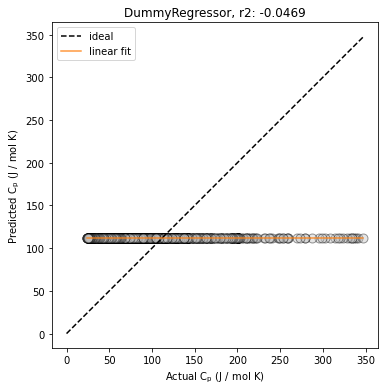

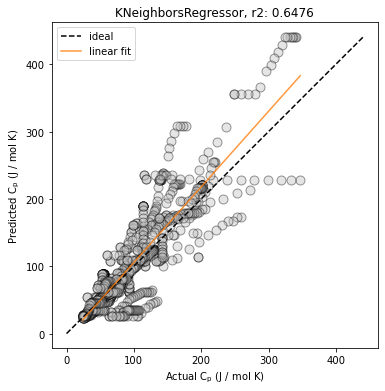

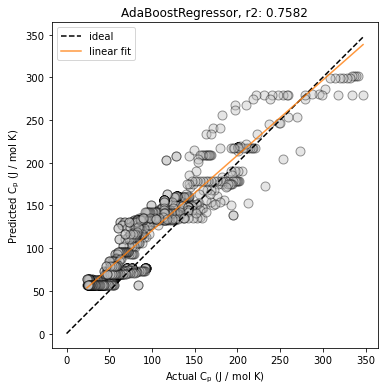

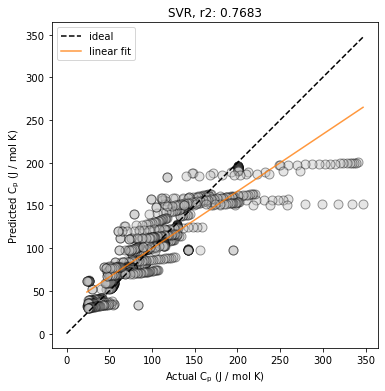

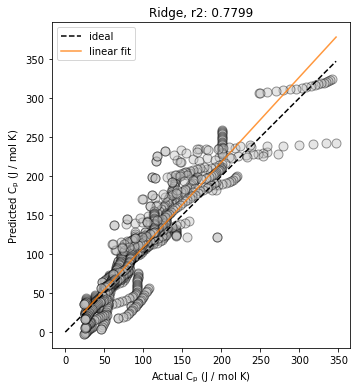

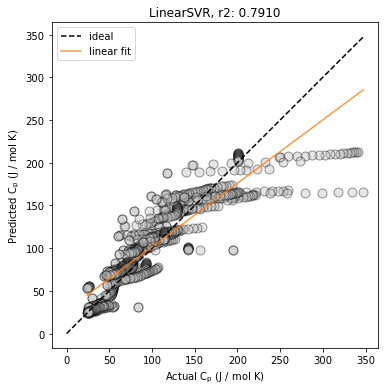

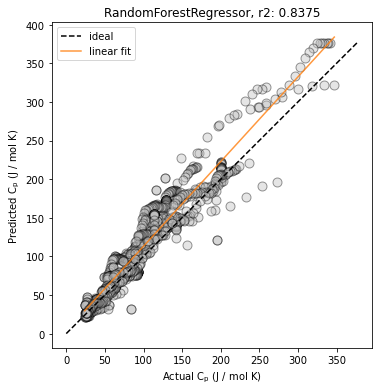

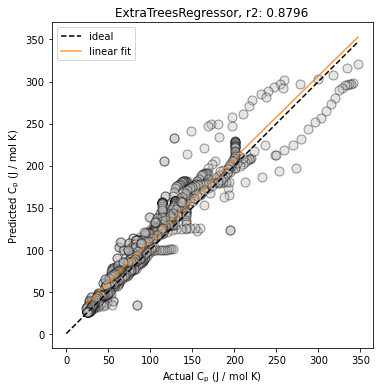

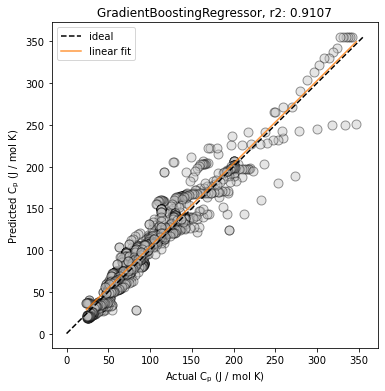

In [40]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(x_val)
    
    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')


### Determining the best model

In [51]:
best_model = df_classics.iloc[-1].copy()
best_name = best_model['model_name']
best_params = best_model['model_params']

model = classic_model_names[best_name](**best_params)
print(model)

GradientBoostingRegressor()


Add validation dataset to the training set to retrain before final test

In [52]:
x_train_new = np.concatenate((x_train, x_val), axis=0)
y_train_new = np.concatenate((y_train, y_val), axis=0)

print(x_train_new.shape)

(4112, 309)


In [54]:
t = time()
model.fit(x_train_new, y_train_new)

dt = time()-t

print('Fit best trained model in:', dt)

Fit best trained model in: 38.279815435409546


## Running retrained model with test data
only run this once - otherwise the model will train with the test set

In [55]:
y_actual_test = y_test
y_pred_test = model.predict(x_test)

r2, mae, rsme = evaluate_model(model, x_test, y_test)

r2: 0.8607119437701974
mae: 14.715074700761356
rsme: 20.124807045616695


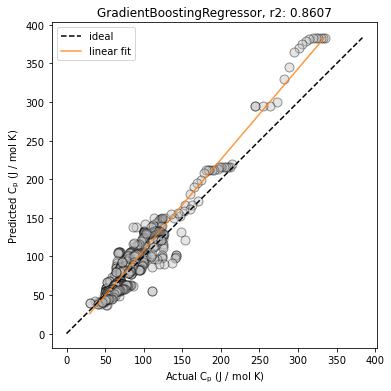

In [57]:
print('r2:', r2)
print('mae:', mae)
print('rsme:', rsme)

plot = plot_pred_act(y_actual_test, y_pred_test, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')


# Citations
Wang, Anthony Yu-Tung; Murdock, Ryan J.; Kauwe, Steven K.; Oliynyk, Anton O.; Gurlo, Aleksander; Brgoch, Jakoah; Persson, Kristin A.; Sparks, Taylor D., Machine Learning for Materials Scientists: An Introductory Guide toward Best Practices, Chemistry of Materials 2020, 32 (12): 4954–4965. DOI: 10.1021/acs.chemmater.0c01907.